In [1]:
import math
import itertools
import numpy as np
import pylab as pl
import pandas as pd
import time
import gc
import matplotlib.pyplot as plt
import scipy
from __future__ import unicode_literals
%matplotlib inline

In [2]:

def insertion_sort(A):
    j=1
    while j < len(A):
        pos = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > pos):
            A[i + 1] = A[i]
            i -= 1
        A[i + 1] = pos
        j += 1

In [3]:
def merge(A, p, q, r):
    L = A[p:q+1]+[float('inf')]
    R = A[q+1:r+1]+[float('inf')]
    i = 0
    j = 0
    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
            
def merge_sort_main(A, p, r):
    if p < r:
        q = int((p + r) / 2.0)
        merge_sort_main(A, p, q)
        merge_sort_main(A, q + 1, r)
        merge(A, p, q, r)

def merge_sort(A):
    t0 = time.clock()
    merge_sort_main(A, 0, len(A) - 1)
    return time.clock() - t0

def WC(A):
    if len(A) <= 1:
        return A
    if len(A) == 2:
        A[0],A[1] = A[1],A[0]
        return A
    i=0;j=0
    L = []; R = []
    while i < len(A):
        L.append(A[i])
        i+=2; j+=1
    i=1; j=0
    while i < len(A):
        R.append(A[i])
        i+=2; j+=1
    L = WC(L)
    R = WC(R)
    return L + R

In [4]:
def calcular_tiempos(sort,array):
    comp = [0]
    timesum = 0
    
    array_copy = list(array)
    tic = time.clock();
    sort(array_copy)
    toc = time.clock();
    timesum += toc - tic
    comp[0] = timesum
    return comp[0]

In [5]:
mejorIn=[]
medioIn=[]
peorIn=[]


mejorMe=[]
medioMe=[]
peorMe=[]
def test(a,b):
    
    for i in xrange(a, b+1, 4):
        time_inse = [0.0, 0.0, 0.0]
        time_merge = [0.0, 0.0, 0.0]
    
        for j in xrange(1000):
            mejor_inse = range(1,i+1)
            mejor_merge = range(1,i+1)
            medio_inse = list(np.random.permutation(i))
            medio_merge = medio_inse
            peor_inse = range(i,0,-1)
            peor_merge = WC(mejor_merge)
            
            time_inse[0] +=  calcular_tiempos(insertion_sort,list(mejor_inse))
            time_inse[1] += calcular_tiempos(insertion_sort,list(medio_inse))
            time_inse[2] += calcular_tiempos(insertion_sort,list(peor_inse))
            
            time_merge[0] += calcular_tiempos(merge_sort,list(mejor_merge))
            time_merge[1] += calcular_tiempos(merge_sort,list(medio_merge))
            time_merge[2] += calcular_tiempos(merge_sort,list(peor_merge))
        
        
        mejorIn.append(time_inse[0] / 1000)
        medioIn.append(time_inse[1] / 1000)
        peorIn.append(time_inse[2] / 1000)
        
        mejorMe.append(time_merge[0] / 1000)
        medioMe.append(time_merge[1] / 1000)
        peorMe.append(time_merge[2] / 1000)
        
test(1,100)


print "mejores: ", mejorIn
print "promedios",medioIn
print "peores", peorIn

mejores:  [1.1940053405224906e-06, 5.545795578758977e-06, 8.823323132400252e-06, 1.3282454108625829e-05, 1.545278974729647e-05, 1.7813430678408793e-05, 2.1679407855467403e-05, 2.4382598312995717e-05, 2.6537538467325206e-05, 2.9860824821613007e-05, 3.873845980152346e-05, 4.4711907722888357e-05, 4.377021726450892e-05, 4.778031328104859e-05, 5.076404367533982e-05, 4.974922466633558e-05, 5.5687605095428696e-05, 6.45652400755381e-05, 5.9678456756607546e-05, 6.452161953649238e-05, 6.671846962041173e-05, 7.024489083732277e-05, 7.296176617019511e-05, 7.345741523489834e-05, 7.926450639533301e-05]
promedios [1.137555231300027e-06, 8.567587031528357e-06, 1.9231953498793697e-05, 3.7493563832245e-05, 5.3505722843639745e-05, 7.173568690374621e-05, 0.00010166237018613255, 0.0001308586232673674, 0.00015773144117130311, 0.00019741116377888445, 0.00027399428998593935, 0.00034740295285387644, 0.00036449878290146387, 0.0004380643941791327, 0.0004858883279991488, 0.0005157405997738103, 0.000610785905262972

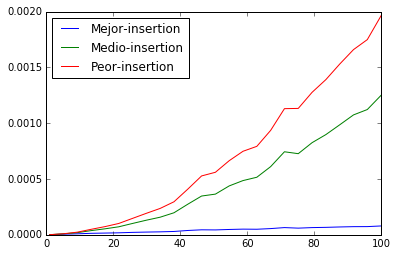

In [6]:
x = np.linspace(1,100,100/4)
plt.plot(x,mejorIn,x,medioIn,x,peorIn)
plt.legend(['Mejor-insertion','Medio-insertion','Peor-insertion'],loc='best')

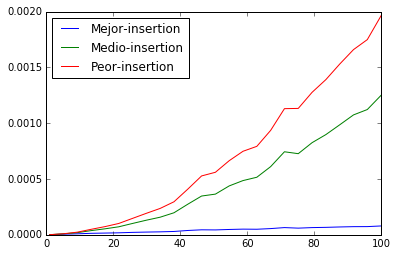

In [7]:
x = np.linspace(1,100,100/4)
plt.plot(x,mejorIn,x,medioIn,x,peorIn)
plt.legend(['Mejor-insertion','Medio-insertion','Peor-insertion'],loc='best')

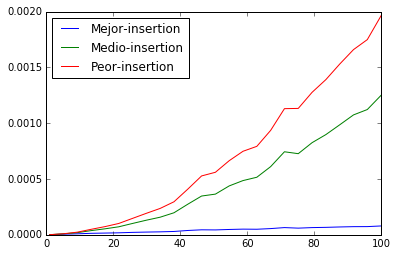

In [8]:
x = np.linspace(1,100,100/4)
plt.plot(x,mejorIn,x,medioIn,x,peorIn)
plt.legend(['Mejor-insertion','Medio-insertion','Peor-insertion'],loc='best')

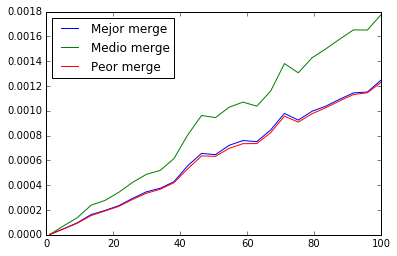

In [9]:

x = np.linspace(1,100,100/4)
plt.plot(x,mejorMe,x,medioMe,x,peorMe)
plt.legend(['Mejor merge','Medio merge','Peor merge'],loc='best')

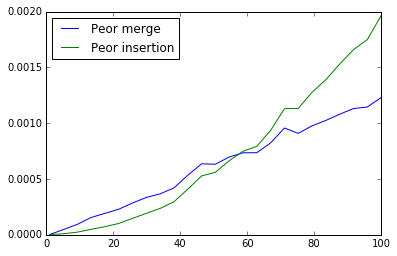

In [10]:
plt.plot(x,peorMe,x,peorIn)
plt.legend(['Peor merge','Peor insertion'],loc='best')